In [1]:
#a. Loading and preprocessing the image data.
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

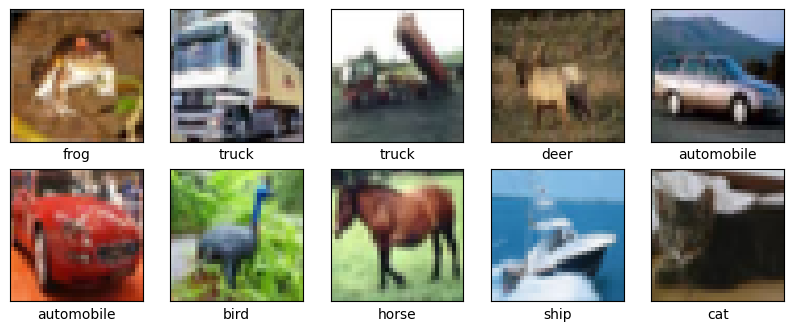

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
#b. Defining the model’s architecture. 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#c. Training the model.
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
epochs = 10
H = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs = epochs, batch_size = 128)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.3255 - loss: 1.8299 - val_accuracy: 0.5164 - val_loss: 1.3338
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.5377 - loss: 1.2914 - val_accuracy: 0.5889 - val_loss: 1.1691
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.5957 - loss: 1.1447 - val_accuracy: 0.6297 - val_loss: 1.0612
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.6376 - loss: 1.0321 - val_accuracy: 0.6434 - val_loss: 1.0098
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6648 - loss: 0.9656 - val_accuracy: 0.6637 - val_loss: 0.9699
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.6853 - loss: 0.8948 - val_accuracy: 0.6824 - val_loss: 0.9255
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7062 - loss: 0.8398 - val_accuracy: 0.6670 - val_loss: 0.9577
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.7270 - loss: 0.7871 - 

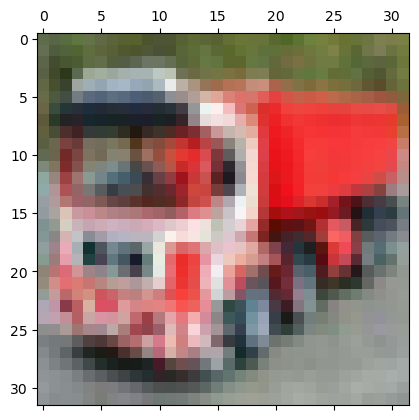

In [7]:
#d.  Estimating the model’s performance
plt.matshow(test_images[666])

In [8]:
import numpy as np
import seaborn as sns

In [9]:
predictions = model.predict(test_images, batch_size=128)
np.argmax(predictions[666])

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


9

In [10]:
y_predicted_labels = [np.argmax(i) for i in predictions]
y_predicted_labels[:5]

[3, 8, 8, 0, 4]

<Axes: >

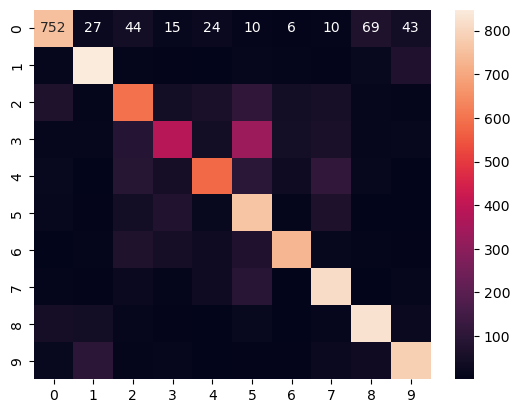

In [11]:
cm = tf.math.confusion_matrix(test_labels, y_predicted_labels)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')

In [12]:
model_eval = model.evaluate(test_images, test_labels)
print("Accuracy of model is:", model_eval[1], "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6968 - loss: 0.9010
Accuracy of model is: 0.6886000037193298 %
